<a href="https://colab.research.google.com/github/JoDeMiro/Linux/blob/main/Basic%20Linux%20Commands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook was made by [JoDeMiro](http://joedemiro.com). Source and license info is on [GitHub](https://github.com/JoDeMiro/Keras-Multilabel).

In [1]:


# Multilabel Classification

# 

# 142 - Multilabel classification using Keras

# https://www.youtube.com/watch?v=hraKTseOuJA



In [2]:
import os
import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import skimage.io


In [4]:
!rm -rf logs/

In [4]:
!wget www.pintye.com/github/Movie/Movie_Poster_Dataset.zip

--2022-11-15 17:53:47--  http://www.pintye.com/github/Movie/Movie_Poster_Dataset.zip
Resolving www.pintye.com (www.pintye.com)... 195.228.75.19
Connecting to www.pintye.com (www.pintye.com)|195.228.75.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264598929 (252M) [application/zip]
Saving to: ‘Movie_Poster_Dataset.zip’

Movie_Poster_Datase 100%[===================>] 252.34M  54.0MB/s    in 4.3s    

2022-11-15 17:53:52 (59.0 MB/s) - ‘Movie_Poster_Dataset.zip’ saved [264598929/264598929]



In [3]:
!wget www.pintye.com/github/Movie/movie_metadata.csv

--2022-11-15 17:53:27--  http://www.pintye.com/github/Movie/movie_metadata.csv
Resolving www.pintye.com (www.pintye.com)... 195.228.75.19
Connecting to www.pintye.com (www.pintye.com)|195.228.75.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629818 (615K) [text/csv]
Saving to: ‘movie_metadata.csv’

movie_metadata.csv  100%[===================>] 615.06K  --.-KB/s    in 0.03s   

2022-11-15 17:53:28 (23.0 MB/s) - ‘movie_metadata.csv’ saved [629818/629818]



In [5]:
!unzip -f Movie_Poster_Dataset.zip

Archive:  Movie_Poster_Dataset.zip


In [10]:
IMG_DIR = 'Movie_Poster_Dataset/'

In [11]:
metadata = pd.read_csv('movie_metadata.csv')

In [12]:
print(metadata.columns)

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [9]:
IMG_WIDTH   = 190
IMG_HEIGHT  = 260
IMG_CHANELS = 3

In [10]:
# X_list = []

# for i in tqdm.tqdm(range(metadata.shape[0])):
#     img = skimage.io.imread(IMG_DIR + metadata['Id'][i] + '.jpg')
#     img = skimage.transform.resize(img, (IMG_HEIGHT, IMG_WIDTH), preserve_range=False)
#     X_list.append(img)

# X = np.array(X_list)

In [11]:
X = np.zeros((metadata.shape[0], IMG_HEIGHT, IMG_WIDTH, IMG_CHANELS), dtype=np.float64)

for i in tqdm.tqdm(range(metadata.shape[0])):
    img = skimage.io.imread(IMG_DIR + metadata['Id'][i] + '.jpg')
    img = skimage.transform.resize(img, (IMG_HEIGHT, IMG_WIDTH), preserve_range=False)
    X[i] = img

100%|██████████| 7254/7254 [02:16<00:00, 53.21it/s]


tt0091344
['Action', 'Adventure', 'Horror']


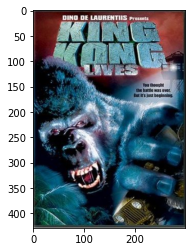

In [12]:
print(metadata['Id'][500])
print(metadata['Genre'][500])
tmp = skimage.io.imread(IMG_DIR + metadata['Id'][500] + '.jpg')
plt.imshow(tmp)
plt.show()

In [13]:
Y = np.array(metadata.drop(['Id', 'Genre'], axis=1))

print(Y.shape)

print(X.shape)

(7254, 25)
(7254, 260, 190, 3)


In [25]:
print(X[0, :, :, :].max())
print(X[0, :, :, :].min())

0.9695162412402325
0.0


In [23]:
X[0, :, :, :]

array([[[3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        [2.16613044e-03, 2.16613044e-03, 2.16613044e-03],
        ...,
        [1.76096234e-03, 1.76096234e-03, 1.76096234e-03],
        [3.91420309e-03, 3.91420309e-03, 3.91420309e-03],
        [6.69663497e-03, 6.69663497e-03, 6.69663497e-03]],

       [[3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        [2.16613044e-03, 2.16613044e-03, 2.16613044e-03],
        ...,
        [1.76096234e-03, 1.76096234e-03, 1.76096234e-03],
        [3.91420309e-03, 3.91420309e-03, 3.91420309e-03],
        [6.69663497e-03, 6.69663497e-03, 6.69663497e-03]],

       [[3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        [3.92156863e-03, 3.92156863e-03, 3.92156863e-03],
        [2.16613044e-03, 2.16613044e-03, 2.16613044e-03],
        ...,
        [1.76096234e-03, 1.76096234e-03, 1.76096234e-03],
        [3.91420309e-03, 3.91

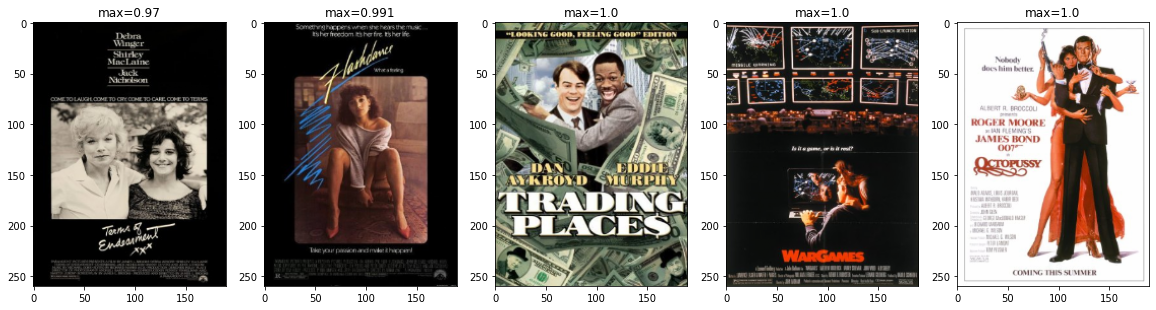

In [26]:
fig = plt.figure(figsize=(20, 5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    tmp = X[i, :, :, :]
    ax.imshow(tmp)
    ax.set_title('max=' + str(round(tmp.max(),3)))
plt.show()

In [27]:
import sklearn.model_selection

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, random_state=1, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5077, 260, 190, 3)
(2177, 260, 190, 3)
(5077, 25)
(2177, 25)


In [ ]:
X_train = X_train[:1000, :, :, :]
Y_train = Y_train[:1000, :]

In [ ]:
X_test = X_test[:1000, :, :, :]
Y_test = Y_test[:1000, :]

In [30]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANELS))

x = tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)


outputs = tf.keras.layers.Dense(Y_train.shape[1], activation='sigmoid')(x)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________


2022-09-22 21:41:21.777437: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-22 21:41:21.777508: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-22 21:41:21.777551: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter): /proc/driver/nvidia/version does not exist
2022-09-22 21:41:21.777979: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 260, 190, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 186, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 256, 186, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 93, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 93, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 89, 32)       12832     
                                                                 
 batch_nor

In [32]:

checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_multilabel.h5', verbose=1, save_best_only=True)

earlystopper = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')

tensorboard  = tf.keras.callbacks.TensorBoard(log_dir='logs')


callbacks = [checkpointer, earlystopper, tensorboard]


In [33]:

result = model.fit(X_train,
                   Y_train,
                   validation_data = (X_test, Y_test),
                   batch_size = 64,
                   epochs = 10,
                   callbacks=callbacks)


Epoch 1/10
159/159 [==============================] - ETA: 0s - loss: 0.4372 - accuracy: 0.1355
Epoch 1: val_loss improved from inf to 0.25520, saving model to model_for_multilabel.h5
159/159 [==============================] - 134s 832ms/step - loss: 0.4372 - accuracy: 0.1355 - val_loss: 0.2552 - val_accuracy: 0.1938
Epoch 2/10
159/159 [==============================] - ETA: 0s - loss: 0.3113 - accuracy: 0.2066
Epoch 2: val_loss improved from 0.25520 to 0.25275, saving model to model_for_multilabel.h5
159/159 [==============================] - 129s 809ms/step - loss: 0.3113 - accuracy: 0.2066 - val_loss: 0.2528 - val_accuracy: 0.2448
Epoch 3/10
159/159 [==============================] - ETA: 0s - loss: 0.2908 - accuracy: 0.2281
Epoch 3: val_loss improved from 0.25275 to 0.25066, saving model to model_for_multilabel.h5
159/159 [==============================] - 131s 822ms/step - loss: 0.2908 - accuracy: 0.2281 - val_loss: 0.2507 - val_accuracy: 0.1943
Epoch 4/10
159/159 [===============

In [34]:
# Eval the accuracy

predicted_train = model.predict(X_train, verbose=1)
predicted_test  = model.predict(X_test, verbose=1)


69/69 [==============================] - 18s 259ms/step


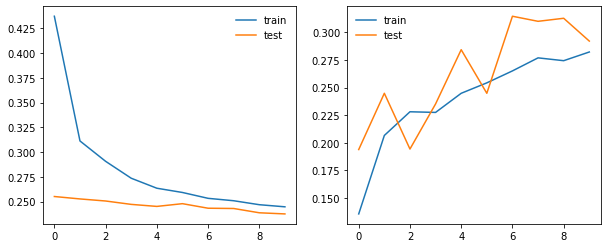

In [35]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))
ax0.plot(result.history['loss'], label='train')
ax0.plot(result.history['val_loss'], label='test')
ax0.legend(frameon=False)
ax1.plot(result.history['accuracy'], label='train')
ax1.plot(result.history['val_accuracy'], label='test')
ax1.legend(frameon=False)
plt.show()

In [37]:
test_img = skimage.io.imread('test_image_family.jpg')

test_img = skimage.transform.resize(test_img, (IMG_HEIGHT, IMG_WIDTH))

test_img = np.expand_dims(test_img, axis=0)

print(test_img.shape)

pred_img = model.predict(test_img)

sorted_pred_img = np.argsort(pred_img[0])[:-11:-1]

labels = metadata.columns[2:]

for i in range(10):
    print('{}'.format(labels[sorted_pred_img[i]]) + '({:.3})'.format(pred_img[0][i]))

(1, 260, 190, 3)
1/1 [==============================] - 0s 36ms/step
Drama(0.254)
Comedy(0.161)
Action(0.0408)
Crime(0.0962)
Romance(0.371)
Thriller(0.219)
Adventure(0.13)
Documentary(0.505)
Horror(0.0646)
Biography(0.088)


In [ ]:

# Tensorboard

!tensorboard --logdir=logs/ --host 0.0.0.0 --port 8080
